### Importing libraries and data set

In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime, timedelta
from datetime import date
import statistics as stat
from pandasql import sqldf
import sqlite3
from scipy import stats as scstats
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly as plot 

In [3]:
#Setting all columns of the dataframe to display
pd.set_option('display.max_columns', None)

In [4]:
#Importing data
crime = pd.read_csv('Montgomery County, MD Crime Data.csv', low_memory = False)

### Data quality checks

### Top 5 Rows



,Incident ID,Offence Code,CR Number,Dispatch Date / Time,Start_Date_Time,End_Date_Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,Block Address,City,State,Zip Code,Agency,Place,Sector,Beat,PRA,Address Number,Street Prefix,Street Name,Street Suffix,Street Type,Latitude,Longitude,Police District Number,Location
0,201403032,5404,220052381,11/27/2022 23:52,11/27/2022 23:52,NaN,90D,1,Crime Against Society,Driving Under the Influence,DRIVING UNDER THE INFLUENCE LIQUOR,GERMANTOWN,NaN,GERMANTOWN,MD,20874.0,MCPD,Street - In vehicle,N,5N2,594,NaN,NaN,MATENY,NaN,RD,39.1568,-77.2665,5D,"(39.1568, -77.2665)"
1,201359823,5404,220000965,1/9/2022 1:18,1/9/2022 1:34,NaN,90D,1,Crime Against Society,Driving Under the Influence,DRIVING UNDER THE INFLUENCE LIQUOR,MONTGOMERY VILLAGE,100 BLK N FREDERICK AVE,GAITHERSBURG,MD,20877.0,GPD,Street - In vehicle,P,6P2,428,100.0,N,FREDERICK,NaN,AVE,39.0944,-77.1517,6D,"(39.0944, -77.1517)"
2,201360056,2304,220001336,1/12/2022 2:53,1/12/2022 2:53,1/12/2022 3:00,23G,1,Crime Against Property,Theft of Motor Vehicle Parts or Accessories,LARCENY - AUTO PARTS,ROCKVILLE,1600 BLK BRADLEY AVE,ROCKVILLE,MD,20851.0,RCPD,Residence - Driveway,A,1A2,293,1600.0,NaN,BRADLEY,NaN,AVE,39.0813,-77.1205,1D,"(39.0813, -77.1205)"
3,201446660,2602,230058306,NaN,10/3/2023 15:11,NaN,26A,1,Crime Against Property,False Pretenses/Swindle/Confidence Game,FRAUD - SWINDLE,MONTGOMERY VILLAGE,1 BLK GRAND CORNER AVE,GAITHERSBURG,MD,20878.0,GPD,Retail - Sporting Goods,P,6P1,549,1.0,NaN,GRAND CORNER,NaN,AVE,39.1181,-77.2004,6D,"(39.1181, -77.2004)"
4,201090710,5707,16037677,NaN,7/25/2016 17:31,NaN,90J,1,Crime Against Society,Trespass of Real Property,TRESPASSING,WHEATON,11100 BLK VEIRS MILL RD,SILVER SPRING,MD,20902.0,MCPD,Retail - Mall,L,4L2,321,11100.0,NaN,VEIRS MILL,NaN,RD,39.0376,-77.0519,4D,"(39.0376, -77.0519)"


### Bottom 5 Rows



,Incident ID,Offence Code,CR Number,Dispatch Date / Time,Start_Date_Time,End_Date_Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,Block Address,City,State,Zip Code,Agency,Place,Sector,Beat,PRA,Address Number,Street Prefix,Street Name,Street Suffix,Street Type,Latitude,Longitude,Police District Number,Location
443328,201526327,9062,250018952,NaN,4/30/2025 7:19,NaN,90Z,1,Crime Against Society,All Other Offenses,FUGITIVE FROM JUSTICE (OUT OF STATE),ROCKVILLE,1300 BLK SEVEN LOCKS RD,POTOMAC,MD,20854.0,MCPD,Jail/Prison,B,1B1,228,1300.0,NaN,SEVEN LOCKS,NaN,RD,39.0669,-77.1616,1D,"(39.0669, -77.1616)"
443329,201526767,9113,250019533,5/4/2025 9:31,5/4/2025 9:31,NaN,90Z,1,Crime Against Society,All Other Offenses,MENTAL ILLNESS - EMERGENCY PETITION,BETHESDA,10500 BLK METROPOLITAN AVE,KENSINGTON,MD,20895.0,MCPD,Street - Other,D,2D3,513,10500.0,NaN,METROPOLITAN,NaN,AVE,39.0271,-77.0711,2D,"(39.0271, -77.0711)"
443330,201526888,2308,250019677,5/5/2025 10:36,4/22/2025 10:36,NaN,23D,1,Crime Against Property,Theft from Building,LARCENY - FROM BLDG,ROCKVILLE,14000 BLK GREAT NOTCH TER,GAITHERSBURG,MD,20878.0,MCPD,Residence -Townhouse/Duplex,B,1B2,557,14000.0,NaN,GREAT NOTCH,NaN,TER,39.0871,-77.2389,1D,"(39.0871, -77.2389)"
443331,201526226,2316,250018702,4/25/2025 16:03,4/10/2025 14:00,4/17/2025 13:00,23H,1,Crime Against Property,All other Larceny,LARCENY - POSTAL,MONTGOMERY VILLAGE,1 BLK BANNISTER CT,GAITHERSBURG,MD,20879.0,MCPD,Residence - Other,R,6R1,503,1.0,NaN,BANNISTER,NaN,CT,39.1666,-77.1872,6D,"(39.1666, -77.1872)"
443332,201526471,1399,250019140,5/1/2025 18:56,5/1/2025 18:56,NaN,13B,1,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,SILVER SPRING,2800 BLK DENNIS AVE,SILVER SPRING,MD,20902.0,MCPD,Residence - Single Family,G,3G2,174,2800.0,NaN,DENNIS,NaN,AVE,0.0000,0.0000,3D,"(0.0, 0.0)"


### Dataset Overview



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443333 entries, 0 to 443332
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Incident ID             443333 non-null  int64  
 1   Offence Code            443333 non-null  object 
 2   CR Number               443333 non-null  int64  
 3   Dispatch Date / Time    379347 non-null  object 
 4   Start_Date_Time         443333 non-null  object 
 5   End_Date_Time           201844 non-null  object 
 6   NIBRS Code              443333 non-null  object 
 7   Victims                 443333 non-null  int64  
 8   Crime Name1             443333 non-null  object 
 9   Crime Name2             443333 non-null  object 
 10  Crime Name3             443333 non-null  object 
 11  Police District Name    442047 non-null  object 
 12  Block Address           407634 non-null  object 
 13  City                    443291 non-null  object 
 14  State               

None

### Total Duplicates



0

### Total Missing Values by Column



Incident ID                    0
Offence Code                   0
CR Number                      0
Dispatch Date / Time       63986
Start_Date_Time                0
End_Date_Time             241489
NIBRS Code                     0
Victims                        0
Crime Name1                    0
Crime Name2                    0
Crime Name3                    0
Police District Name        1286
Block Address              35699
City                          42
State                       9500
Zip Code                    3334
Agency                         0
Place                          0
Sector                         0
Beat                           0
PRA                            9
Address Number             35559
Street Prefix             423272
Street Name                 1205
Street Suffix             437254
Street Type                 1591
Latitude                       0
Longitude                      0
Police District Number         0
Location                       0
dtype: int

### Total Unique Entries by Column



Incident ID               407063
Offence Code                 353
CR Number                 407009
Dispatch Date / Time      329914
Start_Date_Time           322628
End_Date_Time             141078
NIBRS Code                    54
Victims                       10
Crime Name1                    4
Crime Name2                   54
Crime Name3                  353
Police District Name           8
Block Address              22916
City                         295
State                         11
Zip Code                     195
Agency                         8
Place                        100
Sector                        16
Beat                          58
PRA                          795
Address Number               426
Street Prefix                  4
Street Name                 8036
Street Suffix                  6
Street Type                   35
Latitude                    3404
Longitude                   4348
Police District Number         8
Location                   30267
dtype: int

### Overview Descriptive Statistics



,Incident ID,CR Number,Victims,Zip Code,Address Number,Latitude,Longitude
count,4.433330e+05,4.433330e+05,443333.000000,439999.000000,4.077740e+05,443333.000000,443333.000000
mean,2.013041e+08,1.892544e+08,1.021580,20876.813036,8.368769e+03,37.763871,-74.514576
std,1.260404e+05,5.991851e+07,0.183958,141.950162,1.621936e+04,7.054852,13.920061
min,2.010871e+08,1.001107e+07,1.000000,6.000000,0.000000e+00,0.000000,-77.516700
25%,2.011957e+08,1.800328e+08,1.000000,20853.000000,1.500000e+03,39.019000,-77.197300
50%,2.013019e+08,2.000356e+08,1.000000,20878.000000,8.100000e+03,39.071800,-77.098700
75%,2.014105e+08,2.300035e+08,1.000000,20904.000000,1.240000e+04,39.141400,-77.027800
max,2.015271e+08,2.500575e+08,22.000000,29882.000000,2.090600e+06,39.351200,0.000000


### Unique Entries Chart



,index,0
0,Incident ID,407063
1,Offence Code,353
2,CR Number,407009
3,Dispatch Date / Time,329914
4,Start_Date_Time,322628
5,End_Date_Time,141078
6,NIBRS Code,54
7,Victims,10
8,Crime Name1,4
9,Crime Name2,54


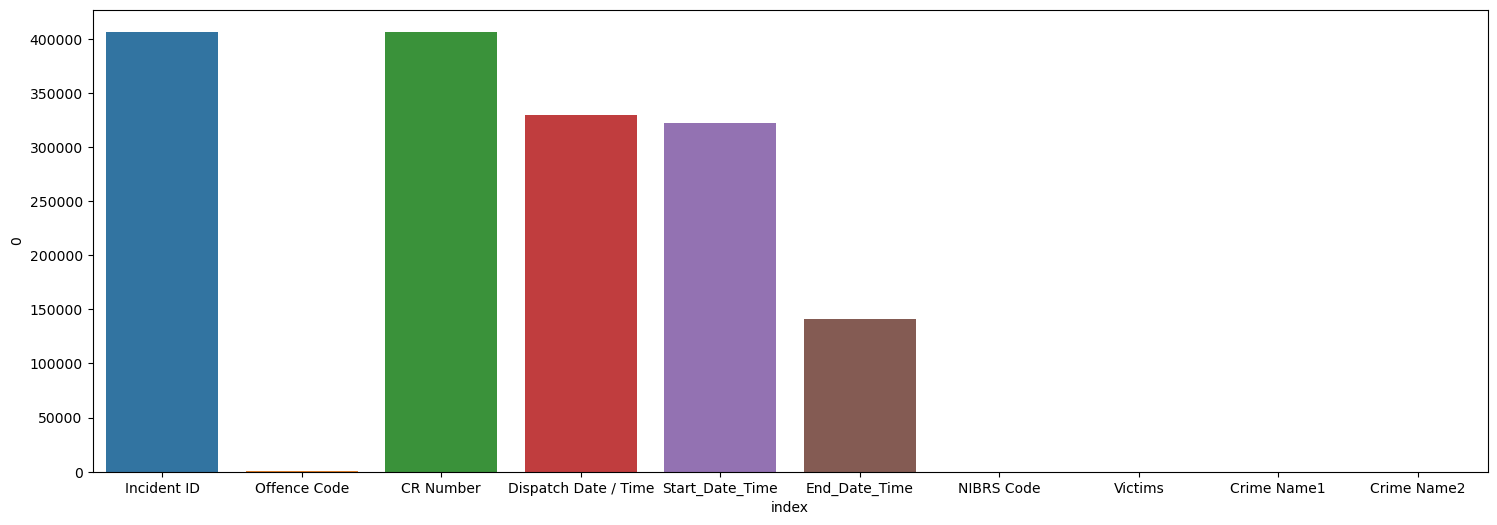

In [6]:
#Data quality checks using custom library
import dataquality as dq

dq.data_check(crime)

In [7]:
#Create copy of dataframe
crime_2 = crime

### Data Cleaning/EDA

In [9]:
#Converting dispatch date/time, start date/time, and end date/time columns to datetime object
crime['Dispatch Date / Time'] = pd.to_datetime(crime['Dispatch Date / Time'])
crime['Start_Date_Time'] = pd.to_datetime(crime['Start_Date_Time'])
crime['End_Date_Time'] = pd.to_datetime(crime['End_Date_Time'])
crime.head()

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,Start_Date_Time,End_Date_Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,Block Address,City,State,Zip Code,Agency,Place,Sector,Beat,PRA,Address Number,Street Prefix,Street Name,Street Suffix,Street Type,Latitude,Longitude,Police District Number,Location
0,201403032,5404,220052381,2022-11-27 23:52:00,2022-11-27 23:52:00,NaT,90D,1,Crime Against Society,Driving Under the Influence,DRIVING UNDER THE INFLUENCE LIQUOR,GERMANTOWN,NaN,GERMANTOWN,MD,20874.0,MCPD,Street - In vehicle,N,5N2,594,NaN,NaN,MATENY,NaN,RD,39.1568,-77.2665,5D,"(39.1568, -77.2665)"
1,201359823,5404,220000965,2022-01-09 01:18:00,2022-01-09 01:34:00,NaT,90D,1,Crime Against Society,Driving Under the Influence,DRIVING UNDER THE INFLUENCE LIQUOR,MONTGOMERY VILLAGE,100 BLK N FREDERICK AVE,GAITHERSBURG,MD,20877.0,GPD,Street - In vehicle,P,6P2,428,100.0,N,FREDERICK,NaN,AVE,39.0944,-77.1517,6D,"(39.0944, -77.1517)"
2,201360056,2304,220001336,2022-01-12 02:53:00,2022-01-12 02:53:00,2022-01-12 03:00:00,23G,1,Crime Against Property,Theft of Motor Vehicle Parts or Accessories,LARCENY - AUTO PARTS,ROCKVILLE,1600 BLK BRADLEY AVE,ROCKVILLE,MD,20851.0,RCPD,Residence - Driveway,A,1A2,293,1600.0,NaN,BRADLEY,NaN,AVE,39.0813,-77.1205,1D,"(39.0813, -77.1205)"
3,201446660,2602,230058306,NaT,2023-10-03 15:11:00,NaT,26A,1,Crime Against Property,False Pretenses/Swindle/Confidence Game,FRAUD - SWINDLE,MONTGOMERY VILLAGE,1 BLK GRAND CORNER AVE,GAITHERSBURG,MD,20878.0,GPD,Retail - Sporting Goods,P,6P1,549,1.0,NaN,GRAND CORNER,NaN,AVE,39.1181,-77.2004,6D,"(39.1181, -77.2004)"
4,201090710,5707,16037677,NaT,2016-07-25 17:31:00,NaT,90J,1,Crime Against Society,Trespass of Real Property,TRESPASSING,WHEATON,11100 BLK VEIRS MILL RD,SILVER SPRING,MD,20902.0,MCPD,Retail - Mall,L,4L2,321,11100.0,NaN,VEIRS MILL,NaN,RD,39.0376,-77.0519,4D,"(39.0376, -77.0519)"


In [10]:
#Rechecking data types
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443333 entries, 0 to 443332
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Incident ID             443333 non-null  int64         
 1   Offence Code            443333 non-null  object        
 2   CR Number               443333 non-null  int64         
 3   Dispatch Date / Time    379347 non-null  datetime64[ns]
 4   Start_Date_Time         443333 non-null  datetime64[ns]
 5   End_Date_Time           201844 non-null  datetime64[ns]
 6   NIBRS Code              443333 non-null  object        
 7   Victims                 443333 non-null  int64         
 8   Crime Name1             443333 non-null  object        
 9   Crime Name2             443333 non-null  object        
 10  Crime Name3             443333 non-null  object        
 11  Police District Name    442047 non-null  object        
 12  Block Address           407634

In [11]:
#Renaming Dispatch Date/Time column
crime.rename(columns = {'Dispatch Date / Time': 'Dispatch_Date_Time'}, inplace = True)
crime.head()

,Incident ID,Offence Code,CR Number,Dispatch_Date_Time,Start_Date_Time,End_Date_Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,Block Address,City,State,Zip Code,Agency,Place,Sector,Beat,PRA,Address Number,Street Prefix,Street Name,Street Suffix,Street Type,Latitude,Longitude,Police District Number,Location
0,201403032,5404,220052381,2022-11-27 23:52:00,2022-11-27 23:52:00,NaT,90D,1,Crime Against Society,Driving Under the Influence,DRIVING UNDER THE INFLUENCE LIQUOR,GERMANTOWN,NaN,GERMANTOWN,MD,20874.0,MCPD,Street - In vehicle,N,5N2,594,NaN,NaN,MATENY,NaN,RD,39.1568,-77.2665,5D,"(39.1568, -77.2665)"
1,201359823,5404,220000965,2022-01-09 01:18:00,2022-01-09 01:34:00,NaT,90D,1,Crime Against Society,Driving Under the Influence,DRIVING UNDER THE INFLUENCE LIQUOR,MONTGOMERY VILLAGE,100 BLK N FREDERICK AVE,GAITHERSBURG,MD,20877.0,GPD,Street - In vehicle,P,6P2,428,100.0,N,FREDERICK,NaN,AVE,39.0944,-77.1517,6D,"(39.0944, -77.1517)"
2,201360056,2304,220001336,2022-01-12 02:53:00,2022-01-12 02:53:00,2022-01-12 03:00:00,23G,1,Crime Against Property,Theft of Motor Vehicle Parts or Accessories,LARCENY - AUTO PARTS,ROCKVILLE,1600 BLK BRADLEY AVE,ROCKVILLE,MD,20851.0,RCPD,Residence - Driveway,A,1A2,293,1600.0,NaN,BRADLEY,NaN,AVE,39.0813,-77.1205,1D,"(39.0813, -77.1205)"
3,201446660,2602,230058306,NaT,2023-10-03 15:11:00,NaT,26A,1,Crime Against Property,False Pretenses/Swindle/Confidence Game,FRAUD - SWINDLE,MONTGOMERY VILLAGE,1 BLK GRAND CORNER AVE,GAITHERSBURG,MD,20878.0,GPD,Retail - Sporting Goods,P,6P1,549,1.0,NaN,GRAND CORNER,NaN,AVE,39.1181,-77.2004,6D,"(39.1181, -77.2004)"
4,201090710,5707,16037677,NaT,2016-07-25 17:31:00,NaT,90J,1,Crime Against Society,Trespass of Real Property,TRESPASSING,WHEATON,11100 BLK VEIRS MILL RD,SILVER SPRING,MD,20902.0,MCPD,Retail - Mall,L,4L2,321,11100.0,NaN,VEIRS MILL,NaN,RD,39.0376,-77.0519,4D,"(39.0376, -77.0519)"


In [12]:
#Adding separate columns for month and year crime occurred
crime['Dispatch Year-Month'] = crime['Dispatch_Date_Time'].dt.strftime('%Y-%b')
crime['Start Year-Month'] = crime['Start_Date_Time'].dt.strftime('%Y-%b')
crime['Start Year'] = crime['Start_Date_Time'].dt.strftime('%Y')
crime['Start Month'] = crime['Start_Date_Time'].dt.strftime('%b')
crime['End Year-Month'] = crime['End_Date_Time'].dt.strftime('%Y-%b')

crime.head()

,Incident ID,Offence Code,CR Number,Dispatch_Date_Time,Start_Date_Time,End_Date_Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,Block Address,City,State,Zip Code,Agency,Place,Sector,Beat,PRA,Address Number,Street Prefix,Street Name,Street Suffix,Street Type,Latitude,Longitude,Police District Number,Location,Dispatch Year-Month,Start Year-Month,Start Year,Start Month,End Year-Month
0,201403032,5404,220052381,2022-11-27 23:52:00,2022-11-27 23:52:00,NaT,90D,1,Crime Against Society,Driving Under the Influence,DRIVING UNDER THE INFLUENCE LIQUOR,GERMANTOWN,NaN,GERMANTOWN,MD,20874.0,MCPD,Street - In vehicle,N,5N2,594,NaN,NaN,MATENY,NaN,RD,39.1568,-77.2665,5D,"(39.1568, -77.2665)",2022-Nov,2022-Nov,2022,Nov,NaN
1,201359823,5404,220000965,2022-01-09 01:18:00,2022-01-09 01:34:00,NaT,90D,1,Crime Against Society,Driving Under the Influence,DRIVING UNDER THE INFLUENCE LIQUOR,MONTGOMERY VILLAGE,100 BLK N FREDERICK AVE,GAITHERSBURG,MD,20877.0,GPD,Street - In vehicle,P,6P2,428,100.0,N,FREDERICK,NaN,AVE,39.0944,-77.1517,6D,"(39.0944, -77.1517)",2022-Jan,2022-Jan,2022,Jan,NaN
2,201360056,2304,220001336,2022-01-12 02:53:00,2022-01-12 02:53:00,2022-01-12 03:00:00,23G,1,Crime Against Property,Theft of Motor Vehicle Parts or Accessories,LARCENY - AUTO PARTS,ROCKVILLE,1600 BLK BRADLEY AVE,ROCKVILLE,MD,20851.0,RCPD,Residence - Driveway,A,1A2,293,1600.0,NaN,BRADLEY,NaN,AVE,39.0813,-77.1205,1D,"(39.0813, -77.1205)",2022-Jan,2022-Jan,2022,Jan,2022-Jan
3,201446660,2602,230058306,NaT,2023-10-03 15:11:00,NaT,26A,1,Crime Against Property,False Pretenses/Swindle/Confidence Game,FRAUD - SWINDLE,MONTGOMERY VILLAGE,1 BLK GRAND CORNER AVE,GAITHERSBURG,MD,20878.0,GPD,Retail - Sporting Goods,P,6P1,549,1.0,NaN,GRAND CORNER,NaN,AVE,39.1181,-77.2004,6D,"(39.1181, -77.2004)",NaN,2023-Oct,2023,Oct,NaN
4,201090710,5707,16037677,NaT,2016-07-25 17:31:00,NaT,90J,1,Crime Against Society,Trespass of Real Property,TRESPASSING,WHEATON,11100 BLK VEIRS MILL RD,SILVER SPRING,MD,20902.0,MCPD,Retail - Mall,L,4L2,321,11100.0,NaN,VEIRS MILL,NaN,RD,39.0376,-77.0519,4D,"(39.0376, -77.0519)",NaN,2016-Jul,2016,Jul,NaN


In [13]:
#Sorting data by start date of crime
crime_sorted = crime.sort_values(by = ['Start_Date_Time'])

#Pulling back earliest crime in dataset
print('Earliest Crime:')
display(crime_sorted.head(1))

#Pulling back latest crime in dataset
print('Latest Crime:')
display(crime_sorted.tail(1))

#Data set goes from 2016 to 2025

Earliest Crime:


,Incident ID,Offence Code,CR Number,Dispatch_Date_Time,Start_Date_Time,End_Date_Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,Block Address,City,State,Zip Code,Agency,Place,Sector,Beat,PRA,Address Number,Street Prefix,Street Name,Street Suffix,Street Type,Latitude,Longitude,Police District Number,Location,Dispatch Year-Month,Start Year-Month,Start Year,Start Month,End Year-Month
226656,201130906,2308,170503555,2017-04-22 13:26:00,2016-07-01,2017-04-22 13:05:00,23D,1,Crime Against Property,Theft from Building,LARCENY - FROM BLDG,SILVER SPRING,1100 BLK E WEST HWY,SILVER SPRING,MD,20910.0,MCPD,Residence - Apartment/Condo,G,3G1,668,1100.0,E,WEST,NaN,HWY,39.1244,-77.2032,3D,"(39.1244, -77.2032)",2017-Apr,2016-Jul,2016,Jul,2017-Apr


Latest Crime:


,Incident ID,Offence Code,CR Number,Dispatch_Date_Time,Start_Date_Time,End_Date_Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,Block Address,City,State,Zip Code,Agency,Place,Sector,Beat,PRA,Address Number,Street Prefix,Street Name,Street Suffix,Street Type,Latitude,Longitude,Police District Number,Location,Dispatch Year-Month,Start Year-Month,Start Year,Start Month,End Year-Month
443198,201527124,9107,250019992,NaT,2025-05-06 20:05:00,NaT,90Z,1,Crime Against Society,All Other Offenses,MISSING PERSON,SILVER SPRING,8000 BLK GEORGIA AVE,SILVER SPRING,MD,20910.0,MCPD,Residence - Apartment/Condo,G,3G1,91,8000.0,NaN,GEORGIA,NaN,AVE,38.9881,-77.0267,3D,"(38.9881, -77.0267)",NaN,2025-May,2025,May,NaN


In [14]:
#Creating subset where dispatch date/time is not null
not_null_dispatch = crime.loc[crime['Dispatch Year-Month'].notnull()]
not_null_dispatch.head()

,Incident ID,Offence Code,CR Number,Dispatch_Date_Time,Start_Date_Time,End_Date_Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,Block Address,City,State,Zip Code,Agency,Place,Sector,Beat,PRA,Address Number,Street Prefix,Street Name,Street Suffix,Street Type,Latitude,Longitude,Police District Number,Location,Dispatch Year-Month,Start Year-Month,Start Year,Start Month,End Year-Month
0,201403032,5404,220052381,2022-11-27 23:52:00,2022-11-27 23:52:00,NaT,90D,1,Crime Against Society,Driving Under the Influence,DRIVING UNDER THE INFLUENCE LIQUOR,GERMANTOWN,NaN,GERMANTOWN,MD,20874.0,MCPD,Street - In vehicle,N,5N2,594,NaN,NaN,MATENY,NaN,RD,39.1568,-77.2665,5D,"(39.1568, -77.2665)",2022-Nov,2022-Nov,2022,Nov,NaN
1,201359823,5404,220000965,2022-01-09 01:18:00,2022-01-09 01:34:00,NaT,90D,1,Crime Against Society,Driving Under the Influence,DRIVING UNDER THE INFLUENCE LIQUOR,MONTGOMERY VILLAGE,100 BLK N FREDERICK AVE,GAITHERSBURG,MD,20877.0,GPD,Street - In vehicle,P,6P2,428,100.0,N,FREDERICK,NaN,AVE,39.0944,-77.1517,6D,"(39.0944, -77.1517)",2022-Jan,2022-Jan,2022,Jan,NaN
2,201360056,2304,220001336,2022-01-12 02:53:00,2022-01-12 02:53:00,2022-01-12 03:00:00,23G,1,Crime Against Property,Theft of Motor Vehicle Parts or Accessories,LARCENY - AUTO PARTS,ROCKVILLE,1600 BLK BRADLEY AVE,ROCKVILLE,MD,20851.0,RCPD,Residence - Driveway,A,1A2,293,1600.0,NaN,BRADLEY,NaN,AVE,39.0813,-77.1205,1D,"(39.0813, -77.1205)",2022-Jan,2022-Jan,2022,Jan,2022-Jan
5,201360519,3562,220001908,2022-01-15 22:48:00,2022-01-15 22:50:00,2022-01-15 00:00:00,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,ROCKVILLE,NaN,ROCKVILLE,MD,20850.0,RCPD,Street - In vehicle,A,1A3,278,NaN,NaN,ROCKVILLE,NaN,PIK,39.0722,-77.1332,1D,"(39.0722, -77.1332)",2022-Jan,2022-Jan,2022,Jan,2022-Jan
10,201228679,3562,190009437,2019-02-27 22:42:00,2019-02-27 22:42:00,NaT,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,SILVER SPRING,NaN,SILVER SPRING,MD,20910.0,MCPD,Street - In vehicle,G,3G1,94,NaN,NaN,GEORGIA,NaN,AVE,39.1124,-77.0755,3D,"(39.1124, -77.0755)",2019-Feb,2019-Feb,2019,Feb,NaN


In [15]:
#Pulling back entries where the dispatch month/year does not align with the start month/year
crime_dates = not_null_dispatch.loc[not_null_dispatch['Dispatch Year-Month'] != not_null_dispatch['Start Year-Month']]

crime_dates # 29,504 entries where the dispatch date/time and start date/time do not occur in the same month/year.

,Incident ID,Offence Code,CR Number,Dispatch_Date_Time,Start_Date_Time,End_Date_Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,Block Address,City,State,Zip Code,Agency,Place,Sector,Beat,PRA,Address Number,Street Prefix,Street Name,Street Suffix,Street Type,Latitude,Longitude,Police District Number,Location,Dispatch Year-Month,Start Year-Month,Start Year,Start Month,End Year-Month
33,201451226,2605,230063919,2023-11-02 09:40:00,2023-10-11 07:00:00,2023-10-20 17:00:00,26B,1,Crime Against Property,Credit Card/Automatic Teller Machine Fraud,FRAUD - ILLEGAL USE CREDIT CARDS,SILVER SPRING,15000 BLK BLACKBURN RD,BURTONSVILLE,MD,20866.0,MCPD,Other/Unknown,I,3I2,381,15000.0,NaN,BLACKBURN,NaN,RD,39.1022,-76.9327,3D,"(39.1022, -76.9327)",2023-Nov,2023-Oct,2023,Oct,2023-Oct
60,201402447,2308,220052465,2022-11-28 11:58:00,2022-10-15 00:00:00,2022-10-18 17:00:00,23D,1,Crime Against Property,Theft from Building,LARCENY - FROM BLDG,MONTGOMERY VILLAGE,300 BLK WEST SIDE DR,GAITHERSBURG,MD,20878.0,MCPD,Other/Unknown,P,6P1,550,300.0,NaN,WEST SIDE,NaN,DR,39.1274,-77.2095,6D,"(39.1274, -77.2095)",2022-Nov,2022-Oct,2022,Oct,2022-Oct
82,201138890,2399,170513396,2017-06-13 11:34:00,2017-04-24 09:00:00,2017-06-07 14:30:00,23H,1,Crime Against Property,All other Larceny,LARCENY (DESCRIBE OFFENSE),GERMANTOWN,18800 BLK WARING STATION RD,GERMANTOWN,MD,20874.0,MCPD,School/College - DO NOT USE,N,5N1,447,18800.0,NaN,WARING STATION,NaN,RD,39.1647,-77.2473,5D,"(39.1647, -77.2473)",2017-Jun,2017-Apr,2017,Apr,2017-Jun
101,201455666,2501,230069463,2023-12-02 11:16:00,2023-10-22 06:00:00,2023-11-27 00:00:00,250,1,Crime Against Property,Counterfeiting/Forgery,FORGERY OF CHECKS,ROCKVILLE,15400 BLK PEACH LEAF DR,GAITHERSBURG,MD,20878.0,MCPD,Other/Unknown,B,1B2,556,15400.0,NaN,PEACH LEAF,NaN,DR,39.1090,-77.2494,1D,"(39.109, -77.2494)",2023-Dec,2023-Oct,2023,Oct,2023-Nov
105,201414093,2610,230008517,2023-02-20 12:53:00,2022-11-21 13:16:00,NaT,26F,1,Crime Against Property,Identity Theft,IDENTITY THEFT,WHEATON,15000 BLK NOTLEY RD,SILVER SPRING,MD,20905.0,MCPD,Street - In vehicle,J,4J1,372,15000.0,NaN,NOTLEY,NaN,RD,39.1041,-77.0176,4D,"(39.1041, -77.0176)",2023-Feb,2022-Nov,2022,Nov,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443273,201526409,9199,250019067,2025-05-01 13:14:00,2025-04-28 14:00:00,2025-05-01 13:08:00,90Z,1,Crime Against Society,All Other Offenses,POLICE INFORMATION,BETHESDA,6300 BLK TILDEN LA,ROCKVILLE,MD,20852.0,MCPD,School - Elementary/Secondary,E,2.00E+03,199,6300.0,NaN,TILDEN,NaN,LA,39.0435,-77.1293,2D,"(39.0435, -77.1293)",2025-May,2025-Apr,2025,Apr,2025-May
443294,201527005,3562,250019014,2025-04-30 16:22:00,2025-05-01 00:00:00,NaT,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,SILVER SPRING,14300 BLK FAIRDALE RD,SILVER SPRING,MD,20905.0,MCPD,School - Elementary/Secondary,I,3I2,384,14300.0,NaN,FAIRDALE,NaN,RD,39.0911,-76.9573,3D,"(39.0911, -76.9573)",2025-Apr,2025-May,2025,May,NaN
443303,201526127,2610,250018749,2025-04-29 17:00:00,2025-03-25 00:00:00,2025-03-25 17:00:00,26F,1,Crime Against Property,Identity Theft,IDENTITY THEFT,SILVER SPRING,10000 BLK BRUNETT AVE,SILVER SPRING,MD,20901.0,MCPD,Other/Unknown,H,3H2,161,10000.0,NaN,BRUNETT,NaN,AVE,0.0000,0.0000,3D,"(0.0, 0.0)",2025-Apr,2025-Mar,2025,Mar,2025-Mar
443318,201526898,2699,250019699,2025-05-05 12:04:00,2025-03-27 12:04:00,2025-04-24 00:00:00,26A,1,Crime Against Property,False Pretenses/Swindle/Confidence Game,FRAUD (DESCRIBE OFFENSE),MONTGOMERY VILLAGE,8300 BLK BEECHCRAFT AVE,GAITHERSBURG,MD,20879.0,MCPD,Commercial - Office Building,R,6R3,421,8300.0,NaN,BEECHCRAFT,NaN,AVE,39.1678,-77.1696,6D,"(39.1677, -77.1696)",2025-May,2025-Mar,2025,Mar,2025-Apr


In [16]:
#Pulling back entries where State is not MD
not_MD = crime.loc[(crime['State'] != 'MD') & (crime['State'].notnull())]
not_MD # 292 entries where the state is listed as something other than MD (not including nulls)

,Incident ID,Offence Code,CR Number,Dispatch_Date_Time,Start_Date_Time,End_Date_Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,Block Address,City,State,Zip Code,Agency,Place,Sector,Beat,PRA,Address Number,Street Prefix,Street Name,Street Suffix,Street Type,Latitude,Longitude,Police District Number,Location,Dispatch Year-Month,Start Year-Month,Start Year,Start Month,End Year-Month
3136,201443760,1315,230054753,2023-09-14 01:06:00,2023-09-14 01:04:00,NaT,13A,2,Crime Against Person,Aggravated Assault,ASSAULT - AGGRAVATED - OTHER,MONTGOMERY VILLAGE,NaN,GAITHERSBURG,16,20879.0,MCPD,Street - Residential,R,6R3,420,NaN,NaN,STREAMSIDE,NaN,DR,39.1556,-77.1680,6D,"(39.1556, -77.168)",2023-Sep,2023-Sep,2023,Sep,NaN
6058,201471872,2399,240014721,NaT,2023-02-04 12:00:00,NaT,23H,1,Crime Against Property,All other Larceny,LARCENY (DESCRIBE OFFENSE),WHEATON,12900 BLK ESTELLE RD,SILVER SPRING,16,20906.0,MCPD,Residence - Single Family,K,4K2,336,12900.0,NaN,ESTELLE,NaN,RD,39.0671,-77.0626,4D,"(39.0671, -77.0626)",NaN,2023-Feb,2023,Feb,NaN
13732,201442270,5404,230032125,2023-07-05 23:04:00,2023-07-05 23:00:00,2023-07-05 23:15:00,90D,1,Crime Against Society,Driving Under the Influence,DRIVING UNDER THE INFLUENCE LIQUOR,ROCKVILLE,NaN,BEALSVILLE,16,20839.0,MCPD,Street - Other,B,1B3,723,NaN,NaN,DARNESTOWN,NaN,RD,39.2042,-77.4338,1D,"(39.2042, -77.4338)",2023-Jul,2023-Jul,2023,Jul,2023-Jul
14445,201395559,2602,220042930,2022-10-02 11:05:00,2022-10-01 15:48:00,NaT,26A,1,Crime Against Property,False Pretenses/Swindle/Confidence Game,FRAUD - SWINDLE,WHEATON,4200 BLK ROUND HILL RD,SILVER SPRING,16,20906.0,MCPD,Other/Unknown,L,4L1,310,4200.0,NaN,ROUND HILL,NaN,RD,39.0479,-77.0828,4D,"(39.0479, -77.0828)",2022-Oct,2022-Oct,2022,Oct,NaN
17273,201398015,1206,220047117,2022-10-27 09:49:00,2022-10-15 19:00:00,NaT,120,1,Crime Against Property,Robbery,ROBBERY - STREET-STRONG-ARM,WHEATON,12300 BLK GEORGIA AVE,SILVER SPRING,16,20906.0,MCPD,Street - Bus Stop,J,4J1,536,12300.0,NaN,GEORGIA,NaN,AVE,39.0582,-77.0500,4D,"(39.0582, -77.05)",2022-Oct,2022-Oct,2022,Oct,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440553,201525557,3522,250017902,2025-04-24 22:07:00,2025-04-24 22:07:00,NaT,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - OPIUM OR DERIVATIVE - POSSESS,NaN,NaN,WASHINGTON DC,DC,20012.0,MCPD,Street - In vehicle,w,own,Unknown,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,Unknown,"(0.0, 0.0)",2025-Apr,2025-Apr,2025,Apr,NaN
440554,201525557,3560,250017902,2025-04-24 22:07:00,2025-04-24 22:07:00,NaT,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - SELL,NaN,NaN,WASHINGTON DC,DC,20012.0,MCPD,Street - In vehicle,w,own,Unknown,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,Unknown,"(0.0, 0.0)",2025-Apr,2025-Apr,2025,Apr,NaN
440555,201525557,5202,250017902,2025-04-24 22:07:00,2025-04-24 22:07:00,NaT,520,1,Crime Against Society,Weapon Law Violations,WEAPON - CONCEALED,NaN,NaN,WASHINGTON DC,DC,20012.0,MCPD,Street - In vehicle,w,own,Unknown,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,Unknown,"(0.0, 0.0)",2025-Apr,2025-Apr,2025,Apr,NaN
440660,201526358,2303,250018869,2025-04-30 12:54:00,2025-04-30 12:54:00,NaT,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,NaN,NaN,CHEVY CAHSE,DC,20815.0,MCPD,Retail - Department/Discount Store,w,own,Unknown,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,Unknown,"(0.0, 0.0)",2025-Apr,2025-Apr,2025,Apr,NaN


In [17]:
#Creating a subset to only include entries for Maryland (including null values)
MD_crime = crime.loc[(crime['State'] == 'MD') | (crime['State'].isnull())]
MD_crime

,Incident ID,Offence Code,CR Number,Dispatch_Date_Time,Start_Date_Time,End_Date_Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,Block Address,City,State,Zip Code,Agency,Place,Sector,Beat,PRA,Address Number,Street Prefix,Street Name,Street Suffix,Street Type,Latitude,Longitude,Police District Number,Location,Dispatch Year-Month,Start Year-Month,Start Year,Start Month,End Year-Month
0,201403032,5404,220052381,2022-11-27 23:52:00,2022-11-27 23:52:00,NaT,90D,1,Crime Against Society,Driving Under the Influence,DRIVING UNDER THE INFLUENCE LIQUOR,GERMANTOWN,NaN,GERMANTOWN,MD,20874.0,MCPD,Street - In vehicle,N,5N2,594,NaN,NaN,MATENY,NaN,RD,39.1568,-77.2665,5D,"(39.1568, -77.2665)",2022-Nov,2022-Nov,2022,Nov,NaN
1,201359823,5404,220000965,2022-01-09 01:18:00,2022-01-09 01:34:00,NaT,90D,1,Crime Against Society,Driving Under the Influence,DRIVING UNDER THE INFLUENCE LIQUOR,MONTGOMERY VILLAGE,100 BLK N FREDERICK AVE,GAITHERSBURG,MD,20877.0,GPD,Street - In vehicle,P,6P2,428,100.0,N,FREDERICK,NaN,AVE,39.0944,-77.1517,6D,"(39.0944, -77.1517)",2022-Jan,2022-Jan,2022,Jan,NaN
2,201360056,2304,220001336,2022-01-12 02:53:00,2022-01-12 02:53:00,2022-01-12 03:00:00,23G,1,Crime Against Property,Theft of Motor Vehicle Parts or Accessories,LARCENY - AUTO PARTS,ROCKVILLE,1600 BLK BRADLEY AVE,ROCKVILLE,MD,20851.0,RCPD,Residence - Driveway,A,1A2,293,1600.0,NaN,BRADLEY,NaN,AVE,39.0813,-77.1205,1D,"(39.0813, -77.1205)",2022-Jan,2022-Jan,2022,Jan,2022-Jan
3,201446660,2602,230058306,NaT,2023-10-03 15:11:00,NaT,26A,1,Crime Against Property,False Pretenses/Swindle/Confidence Game,FRAUD - SWINDLE,MONTGOMERY VILLAGE,1 BLK GRAND CORNER AVE,GAITHERSBURG,MD,20878.0,GPD,Retail - Sporting Goods,P,6P1,549,1.0,NaN,GRAND CORNER,NaN,AVE,39.1181,-77.2004,6D,"(39.1181, -77.2004)",NaN,2023-Oct,2023,Oct,NaN
4,201090710,5707,16037677,NaT,2016-07-25 17:31:00,NaT,90J,1,Crime Against Society,Trespass of Real Property,TRESPASSING,WHEATON,11100 BLK VEIRS MILL RD,SILVER SPRING,MD,20902.0,MCPD,Retail - Mall,L,4L2,321,11100.0,NaN,VEIRS MILL,NaN,RD,39.0376,-77.0519,4D,"(39.0376, -77.0519)",NaN,2016-Jul,2016,Jul,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443328,201526327,9062,250018952,NaT,2025-04-30 07:19:00,NaT,90Z,1,Crime Against Society,All Other Offenses,FUGITIVE FROM JUSTICE (OUT OF STATE),ROCKVILLE,1300 BLK SEVEN LOCKS RD,POTOMAC,MD,20854.0,MCPD,Jail/Prison,B,1B1,228,1300.0,NaN,SEVEN LOCKS,NaN,RD,39.0669,-77.1616,1D,"(39.0669, -77.1616)",NaN,2025-Apr,2025,Apr,NaN
443329,201526767,9113,250019533,2025-05-04 09:31:00,2025-05-04 09:31:00,NaT,90Z,1,Crime Against Society,All Other Offenses,MENTAL ILLNESS - EMERGENCY PETITION,BETHESDA,10500 BLK METROPOLITAN AVE,KENSINGTON,MD,20895.0,MCPD,Street - Other,D,2D3,513,10500.0,NaN,METROPOLITAN,NaN,AVE,39.0271,-77.0711,2D,"(39.0271, -77.0711)",2025-May,2025-May,2025,May,NaN
443330,201526888,2308,250019677,2025-05-05 10:36:00,2025-04-22 10:36:00,NaT,23D,1,Crime Against Property,Theft from Building,LARCENY - FROM BLDG,ROCKVILLE,14000 BLK GREAT NOTCH TER,GAITHERSBURG,MD,20878.0,MCPD,Residence -Townhouse/Duplex,B,1B2,557,14000.0,NaN,GREAT NOTCH,NaN,TER,39.0871,-77.2389,1D,"(39.0871, -77.2389)",2025-May,2025-Apr,2025,Apr,NaN
443331,201526226,2316,250018702,2025-04-25 16:03:00,2025-04-10 14:00:00,2025-04-17 13:00:00,23H,1,Crime Against Property,All other Larceny,LARCENY - POSTAL,MONTGOMERY VILLAGE,1 BLK BANNISTER CT,GAITHERSBURG,MD,20879.0,MCPD,Residence - Other,R,6R1,503,1.0,NaN,BANNISTER,NaN,CT,39.1666,-77.1872,6D,"(39.1666, -77.1872)",2025-Apr,2025-Apr,2025,Apr,2025-Apr


In [18]:
#Running data checks on MD_crime
MD_crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 443041 entries, 0 to 443332
Data columns (total 35 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Incident ID             443041 non-null  int64         
 1   Offence Code            443041 non-null  object        
 2   CR Number               443041 non-null  int64         
 3   Dispatch_Date_Time      379207 non-null  datetime64[ns]
 4   Start_Date_Time         443041 non-null  datetime64[ns]
 5   End_Date_Time           201756 non-null  datetime64[ns]
 6   NIBRS Code              443041 non-null  object        
 7   Victims                 443041 non-null  int64         
 8   Crime Name1             443041 non-null  object        
 9   Crime Name2             443041 non-null  object        
 10  Crime Name3             443041 non-null  object        
 11  Police District Name    441805 non-null  object        
 12  Block Address           407428 non-

In [19]:
#Creating subset for all entries where the same Indicident ID appears more than once
duplicate_ID2 = MD_crime[MD_crime.duplicated(subset = ['Incident ID'], keep = False)]
display(duplicate_ID2)

,Incident ID,Offence Code,CR Number,Dispatch_Date_Time,Start_Date_Time,End_Date_Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,Block Address,City,State,Zip Code,Agency,Place,Sector,Beat,PRA,Address Number,Street Prefix,Street Name,Street Suffix,Street Type,Latitude,Longitude,Police District Number,Location,Dispatch Year-Month,Start Year-Month,Start Year,Start Month,End Year-Month
10,201228679,3562,190009437,2019-02-27 22:42:00,2019-02-27 22:42:00,NaT,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,SILVER SPRING,NaN,SILVER SPRING,MD,20910.0,MCPD,Street - In vehicle,G,3G1,94,NaN,NaN,GEORGIA,NaN,AVE,39.1124,-77.0755,3D,"(39.1124, -77.0755)",2019-Feb,2019-Feb,2019,Feb,NaN
14,201478739,1602,240023111,2024-05-16 11:25:00,2024-05-16 11:23:00,2024-05-16 14:30:00,90Z,1,Crime Against Society,All Other Offenses,THREAT - TERRORISTIC - STATE OFFENSES,BETHESDA,4300 BLK E WEST HWY,BETHESDA,MD,20814.0,MCPD,School - Elementary/Secondary,D,2D2,46,4300.0,E,WEST,NaN,HWY,0.0000,0.0000,2D,"(0.0, 0.0)",2024-May,2024-May,2024,May,2024-May
16,201120396,1313,17007461,NaT,2017-02-11 07:19:00,NaT,13B,1,Crime Against Person,Simple Assault,ASSAULT - SIMPLE,WHEATON,1 BLK CARONA CT,SILVER SPRING,MD,20904.0,MCPD,Residence - Single Family,J,4J1,372,1.0,NaN,CARONA,NaN,CT,39.1008,-77.0225,4D,"(39.1008, -77.0225)",NaN,2017-Feb,2017,Feb,NaN
17,201337639,2308,210026590,2021-07-10 20:42:00,2021-07-10 18:00:00,2021-07-10 18:40:00,23D,1,Crime Against Property,Theft from Building,LARCENY - FROM BLDG,BETHESDA,4400 BLK WILLARD AVE,CHEVY CHASE,MD,20815.0,MCPD,Grocery/Supermarket,E,2.00E+01,5,4400.0,NaN,WILLARD,NaN,AVE,38.9618,-77.0862,2D,"(38.9618, -77.0862)",2021-Jul,2021-Jul,2021,Jul,2021-Jul
18,201367088,2305,220009661,2022-03-06 12:08:00,2022-03-05 19:30:00,2022-03-06 12:00:00,23F,1,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,BETHESDA,5200 BLK TUCKERMAN LA,ROCKVILLE,MD,20852.0,MCPD,Street - Commercial,D,2D4,185,5200.0,NaN,TUCKERMAN,NaN,LA,39.0243,-77.1027,2D,"(39.0243, -77.1027)",2022-Mar,2022-Mar,2022,Mar,2022-Mar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443250,201526971,2303,250019248,2025-05-02 14:14:00,2025-05-02 14:14:00,NaT,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,BETHESDA,6900 BLK ARLINGTON RD,BETHESDA,MD,20814.0,MCPD,Retail - Drug Store/Pharmacy,D,2D2,31,6900.0,NaN,ARLINGTON,NaN,RD,38.9780,-77.0987,2D,"(38.978, -77.0987)",2025-May,2025-May,2025,May,NaN
443270,201526083,2305,250018309,2025-04-27 14:26:00,2025-04-27 03:00:00,2025-04-27 13:00:00,23F,1,Crime Against Property,Theft From Motor Vehicle,LARCENY - FROM AUTO,MONTGOMERY VILLAGE,9500 BLK TALL OAKS RD,MONTGOMERY VILLAGE,MD,20886.0,MCPD,Street - Residential,R,6R2,504,9500.0,NaN,TALL OAKS,NaN,RD,39.1824,-77.1993,6D,"(39.1824, -77.1993)",2025-Apr,2025-Apr,2025,Apr,2025-Apr
443287,201525964,2902,250018450,2025-04-28 11:02:00,2025-04-28 06:00:00,2025-04-28 10:30:00,290,1,Crime Against Property,Destruction/Damage/Vandalism of Property,DAMAGE PROPERTY - PRIVATE,GERMANTOWN,22700 BLK CLARKSBURG RD,CLARKSBURG,MD,20871.0,MCPD,Parking Lot - Commercial,N,5N3,466,22700.0,NaN,CLARKSBURG,NaN,RD,39.2286,-77.2888,5D,"(39.2285, -77.2888)",2025-Apr,2025-Apr,2025,Apr,2025-Apr
443307,201526178,2303,250018760,2025-04-29 17:39:00,2025-04-29 17:39:00,NaT,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,SILVER SPRING,12000 BLK CHERRY HILL RD,SILVER SPRING,MD,20904.0,MCPD,Grocery/Supermarket,I,3I1,146,12000.0,NaN,CHERRY HILL,NaN,RD,39.0526,-76.9531,3D,"(39.0526, -76.9531)",2025-Apr,2025-Apr,2025,Apr,NaN


In [20]:
#Sorting subset by duplicate ID numbers
duplicate_ID2_sorted = duplicate_ID2.sort_values(by = ['Incident ID'])
duplicate_ID2_sorted.head(10)

,Incident ID,Offence Code,CR Number,Dispatch_Date_Time,Start_Date_Time,End_Date_Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,Block Address,City,State,Zip Code,Agency,Place,Sector,Beat,PRA,Address Number,Street Prefix,Street Name,Street Suffix,Street Type,Latitude,Longitude,Police District Number,Location,Dispatch Year-Month,Start Year-Month,Start Year,Start Month,End Year-Month
194443,201087097,2303,16033232,NaT,2016-07-01 00:04:00,NaT,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,WHEATON,13700 BLK CONNECTICUT AVE,SILVER SPRING,MD,20906.0,MCPD,Retail - Other,K,4K2,337,13700.0,NaN,CONNECTICUT,NaN,AVE,39.0790,-77.0808,4D,"(39.0789, -77.0808)",NaN,2016-Jul,2016,Jul,NaN
196535,201087097,5707,16033232,NaT,2016-07-01 00:04:00,NaT,90J,1,Crime Against Society,Trespass of Real Property,TRESPASSING,WHEATON,13700 BLK CONNECTICUT AVE,SILVER SPRING,MD,20906.0,MCPD,Retail - Drug Store/Pharmacy,K,4K2,337,13700.0,NaN,CONNECTICUT,NaN,AVE,39.0790,-77.0808,4D,"(39.0789, -77.0808)",NaN,2016-Jul,2016,Jul,NaN
195497,201087097,5202,16033232,NaT,2016-07-01 00:04:00,NaT,520,1,Crime Against Society,Weapon Law Violations,WEAPON - CONCEALED,WHEATON,13700 BLK CONNECTICUT AVE,SILVER SPRING,MD,20906.0,MCPD,Retail - Drug Store/Pharmacy,K,4K2,337,13700.0,NaN,CONNECTICUT,NaN,AVE,39.0790,-77.0808,4D,"(39.0789, -77.0808)",NaN,2016-Jul,2016,Jul,NaN
195055,201087133,2602,16033268,NaT,2016-07-01 08:52:00,NaT,26A,1,Crime Against Property,False Pretenses/Swindle/Confidence Game,FRAUD - SWINDLE,BETHESDA,11800 BLK ROCKVILLE PIK,MCG,NaN,NaN,MCPD,Residence - Apartment/Condo,D,2D4,187,11800.0,NaN,ROCKVILLE,NaN,PIK,39.0504,-77.1148,2D,"(39.0504, -77.1148)",NaN,2016-Jul,2016,Jul,NaN
94711,201087133,9199,16033268,NaT,2016-07-01 08:52:00,NaT,90Z,1,Crime Against Society,All Other Offenses,POLICE INFORMATION,BETHESDA,11800 BLK ROCKVILLE PIK,MCG,NaN,NaN,MCPD,Residence - Apartment/Condo,D,2D4,187,11800.0,NaN,ROCKVILLE,NaN,PIK,39.0504,-77.1148,2D,"(39.0504, -77.1148)",NaN,2016-Jul,2016,Jul,NaN
198132,201087143,3582,16033265,NaT,2016-07-01 07:48:00,2016-07-01 08:00:00,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - BARBITURATE - POSSESS,SILVER SPRING,8600 BLK GEREN RD,SILVER SPRING,MD,20901.0,MCPD,Park,H,3H1,126,8600.0,NaN,GEREN,NaN,RD,38.9971,-77.0065,3D,"(38.9971, -77.0065)",NaN,2016-Jul,2016,Jul,2016-Jul
193839,201087143,3562,16033265,NaT,2016-07-01 07:48:00,2016-07-01 08:00:00,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,SILVER SPRING,8600 BLK GEREN RD,SILVER SPRING,MD,20901.0,MCPD,Park,H,3H1,126,8600.0,NaN,GEREN,NaN,RD,38.9971,-77.0065,3D,"(38.9971, -77.0065)",NaN,2016-Jul,2016,Jul,2016-Jul
195750,201087148,5311,16033275,NaT,2016-07-01 09:46:00,NaT,90C,1,Crime Against Society,Disorderly Conduct,PUBLIC PEACE - DISORDERLY CONDUCT,SILVER SPRING,900 BLK ELLSWORTH DR,SILVER SPRING,MD,20910.0,MCPD,Street - Commercial,G,3G1,671,900.0,NaN,ELLSWORTH,NaN,DR,38.9969,-77.0254,3D,"(38.9969, -77.0254)",NaN,2016-Jul,2016,Jul,NaN
196953,201087148,3615,16033275,NaT,2016-07-01 09:46:00,NaT,90C,1,Crime Against Society,Disorderly Conduct,SEX OFFENSE - INDECENT EXPOSURE TO ADULT,SILVER SPRING,900 BLK ELLSWORTH DR,SILVER SPRING,MD,20910.0,MCPD,Street - Commercial,G,3G1,671,900.0,NaN,ELLSWORTH,NaN,DR,38.9969,-77.0254,3D,"(38.9969, -77.0254)",NaN,2016-Jul,2016,Jul,NaN
197539,201087164,1210,16033267,NaT,2016-07-01 08:13:00,NaT,120,1,Crime Against Property,Robbery,ROBBERY - FORCIBLE PURSE SNATCHING,GERMANTOWN,12900 BLK MIDDLEBROOK RD,GERMANTOWN,MD,20874.0,MCPD,Parking Lot - County,N,5N1,702,12900.0,NaN,MIDDLEBROOK,NaN,RD,39.1788,-77.2673,5D,"(39.1788, -77.2673)",NaN,2016-Jul,2016,Jul,NaN


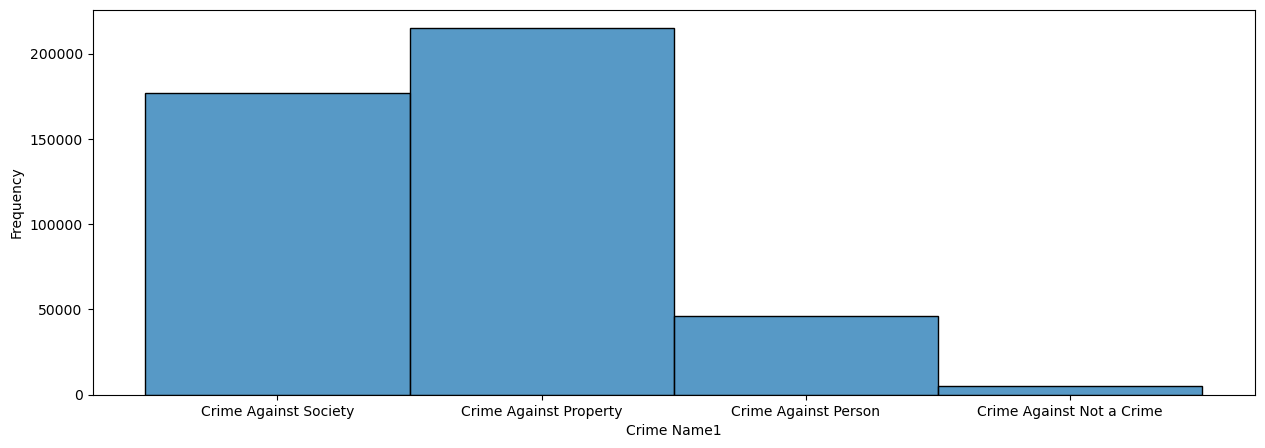

In [21]:
#Distribution of Crime Name 1
plt.figure(figsize = (15, 5))

sns.histplot(data = MD_crime, x = 'Crime Name1')

plt.xlabel('Crime Name1')
plt.ylabel('Frequency')

plt.show()

In [22]:
#Pull back entries where crime name 1 is "Crime Against Not a Crime"
not_crime = MD_crime.loc[MD_crime['Crime Name1'] == 'Crime Against Not a Crime']
not_crime.head()

,Incident ID,Offence Code,CR Number,Dispatch_Date_Time,Start_Date_Time,End_Date_Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,Block Address,City,State,Zip Code,Agency,Place,Sector,Beat,PRA,Address Number,Street Prefix,Street Name,Street Suffix,Street Type,Latitude,Longitude,Police District Number,Location,Dispatch Year-Month,Start Year-Month,Start Year,Start Month,End Year-Month
2683,201495139,9021,240043023,2024-09-10 15:28:00,2024-09-08 02:00:00,NaT,90I,1,Crime Against Not a Crime,Runaway,JUVENILE - RUNAWAY,SILVER SPRING,12800 BLK ECKMOOR RD,SILVER SPRING,MD,20904.0,MCPD,Residence - Single Family,I,3I1,519,12800.0,NaN,ECKMOOR,NaN,RD,39.0661,-76.9991,3D,"(39.0661, -76.9991)",2024-Sep,2024-Sep,2024,Sep,NaN
3520,201483767,9021,240029241,2024-06-20 09:05:00,2024-06-20 09:05:00,NaT,90I,1,Crime Against Not a Crime,Runaway,JUVENILE - RUNAWAY,MONTGOMERY VILLAGE,18300 BLK LOST KNIFE CIR,MONTGOMERY VILLAGE,MD,20886.0,MCPD,Residence - Apartment/Condo,R,6R1,505,18300.0,NaN,LOST KNIFE,NaN,CIR,39.1580,-77.2021,6D,"(39.158, -77.2021)",2024-Jun,2024-Jun,2024,Jun,NaN
3725,201465296,9021,240006835,2024-02-11 13:03:00,2024-02-11 13:00:00,NaT,90I,1,Crime Against Not a Crime,Runaway,JUVENILE - RUNAWAY,MONTGOMERY VILLAGE,19400 BLK BRASSIE PL,MONTGOMERY VILLAGE,MD,20886.0,MCPD,Residence - Apt Ofc/Storage,R,6R2,544,19400.0,NaN,BRASSIE,NaN,PL,39.1743,-77.2022,6D,"(39.1743, -77.2022)",2024-Feb,2024-Feb,2024,Feb,NaN
4266,201472856,9021,240015913,2024-04-05 13:02:00,2024-04-05 13:02:00,NaT,90I,1,Crime Against Not a Crime,Runaway,JUVENILE - RUNAWAY,WHEATON,300 BLK FLANNERY LA,SILVER SPRING,MD,20904.0,MCPD,Residence - Single Family,J,4J1,675,300.0,NaN,FLANNERY,NaN,LA,39.0795,-77.0050,4D,"(39.0795, -77.005)",2024-Apr,2024-Apr,2024,Apr,NaN
4954,201470045,9021,240012579,2024-03-15 19:14:00,2024-03-15 19:14:00,NaT,90I,1,Crime Against Not a Crime,Runaway,JUVENILE - RUNAWAY,BETHESDA,6300 BLK GREENTREE RD,BETHESDA,MD,20817.0,MCPD,Community Center,E,2.00E+02,68,6300.0,NaN,GREENTREE,NaN,RD,39.0016,-77.1278,2D,"(39.0016, -77.1278)",2024-Mar,2024-Mar,2024,Mar,NaN


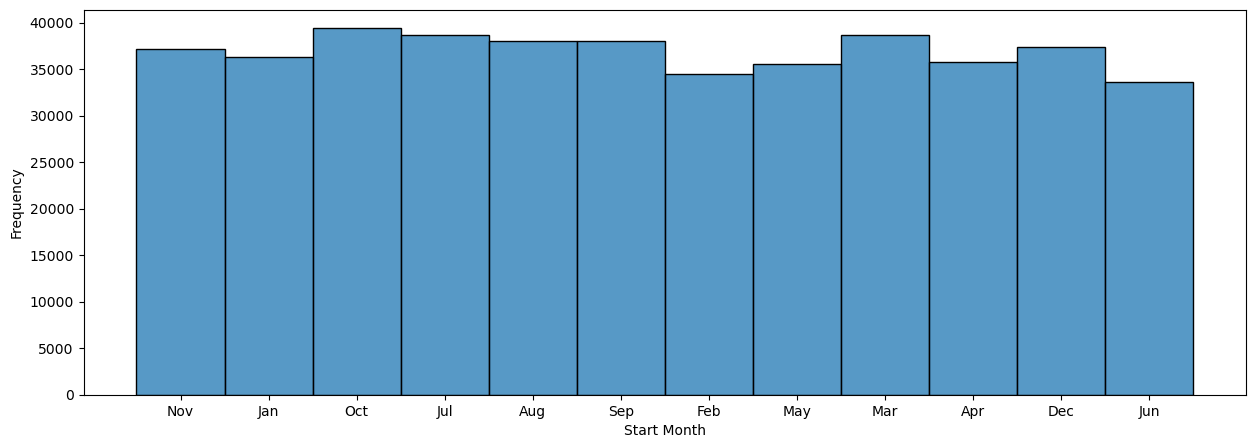

In [23]:
#Distribution of Crime month
plt.figure(figsize = (15, 5))

sns.histplot(data = MD_crime, x = 'Start Month')

plt.xlabel('Start Month')
plt.ylabel('Frequency')

plt.show()

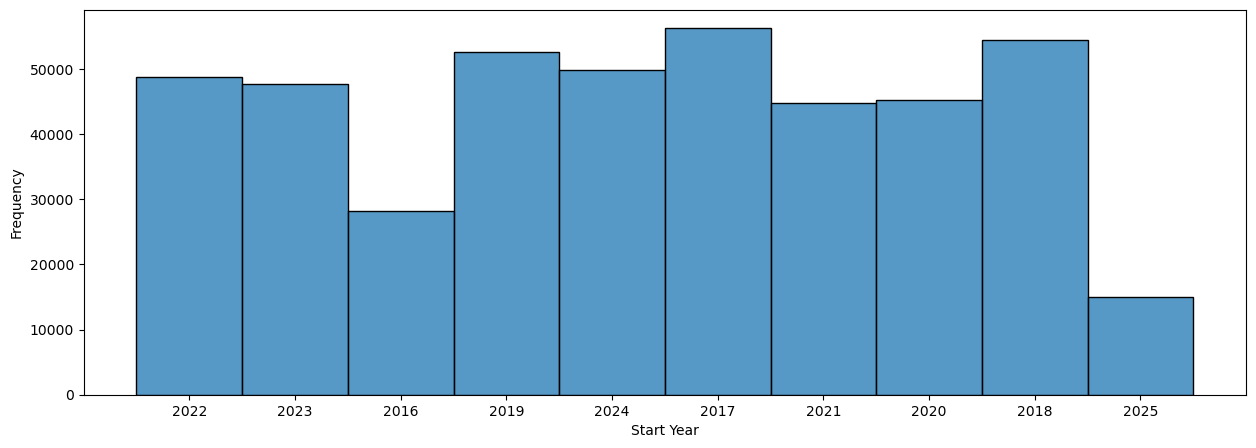

In [24]:
#Distribution of Crime year
plt.figure(figsize = (15, 5))

sns.histplot(data = MD_crime, x = 'Start Year')

plt.xlabel('Start Year')
plt.ylabel('Frequency')

plt.show()

###

### Initial Observations

##### - Dataset goes from 2016 to 2025.
##### - October appears to be the month having the most crime throughout all the years reported. February appears to have the least.
##### - 2017 had the most crimes reported, whereas 2016 had the least (for complete years, 2025 is still reporting).
##### - Crime against property is the most frequently occurring type of crime.
##### - This dataset was supposed to be for Montgomery County, MD, however, there were 292 entries (not including nulls) where the state was listed as something other than MD.
##### - There are 407,063 unique Incident ID's and a total of 443,333 entries, meaning there are some Incident ID's that occur more than once (likely multiple crimes occurring within the same incident, no duplicate entries).

###

### Exporting Dataframes as CSV files

In [30]:
#Exporting MD_crime to a csv
MD_crime.to_csv('MD_crime_cleaned.csv')

In [31]:
#Exporting subset of duplicate IDs to a csv
duplicate_ID2_sorted.to_csv('MD_crime_duplicate_IDs.csv')